# Ridge

## Preparando o data set

In [267]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd


data = 'SkillCraft.csv'

df = pd.read_csv(data)


# Removendo GameID
cleaned_data = df.drop('GameID', 1)

# Checando se existem valores nulos
null_values = cleaned_data.isnull().values.any()
assert null_values == False

## Calculando coeficiente de determinação variando quantidade de rows utilizadas para treinar

Mean absolute error: 431.9784661157695
Coeficiente (100 rows utilizadas para treinar): -75.16088881235748
Mean absolute error: 66.86459261367627
Coeficiente (200 rows utilizadas para treinar): -1.2142755574397883
Mean absolute error: 22.857997910494884
Coeficiente (300 rows utilizadas para treinar): 0.5237676238169231
Mean absolute error: 72.4809532683866
Coeficiente (400 rows utilizadas para treinar): -1.522914525068472
Mean absolute error: 25.138913539376265
Coeficiente (500 rows utilizadas para treinar): 0.4503983020885245
Mean absolute error: 21.9130748018885
Coeficiente (600 rows utilizadas para treinar): 0.543337488865409
Mean absolute error: 22.96761183542899
Coeficiente (700 rows utilizadas para treinar): 0.5083470651965908
Mean absolute error: 20.04284546325456
Coeficiente (800 rows utilizadas para treinar): 0.6305260818606371
Mean absolute error: 20.41731981398071
Coeficiente (900 rows utilizadas para treinar): 0.60073514941165
Mean absolute error: 19.931444227011102
Coeficie

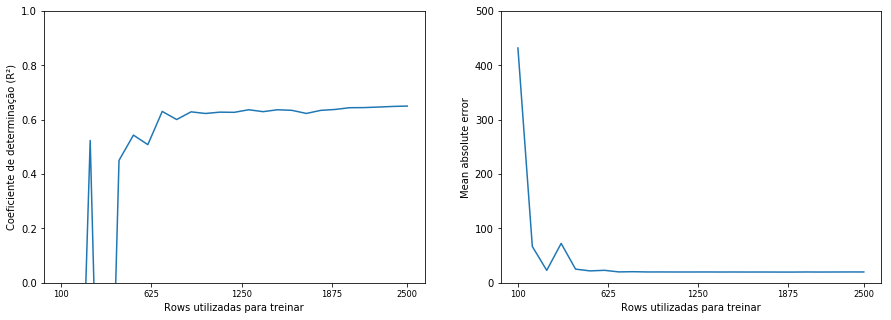

In [276]:
TRAINING_POINTS = 2500 + 1

# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']
test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

clf = Ridge(alpha=1.0)
clf.fit(x, y) 
clf.score(x, y)


initial_coefficient_list = list()
initial_mean_absolute_error_list = list()

for training_points_number in range(100, TRAINING_POINTS, 100):

    training_points = x.head(training_points_number)
    training_labels = y.head(training_points_number)

    clf = Ridge()
    clf.fit(training_points, training_labels) 
    
    coefficient = clf.score(test_points, test_labels)
    initial_coefficient_list.append(coefficient)
    
    predict = clf.predict(test_points)
    mean_abs_err = mean_absolute_error(test_labels, predict)
    initial_mean_absolute_error_list.append(mean_abs_err)
    
    print("Mean absolute error: " + str(mean_abs_err))
    print("Coeficiente ({} rows utilizadas para treinar): ".format(training_points_number) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(initial_coefficient_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(initial_mean_absolute_error_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Mean absolute error')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=500)
plt.ylim(bottom=0)
plt.show()

## Variando o alpha

/opt/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.264938e-17
  overwrite_a=True).T


Coeficiente (alpha = 0.0): 0.970934831550278
Coeficiente (alpha = 0.05): 0.8339261671226368
Coeficiente (alpha = 0.1): 0.7718591715770795
Coeficiente (alpha = 0.15): 0.7379348278236153
Coeficiente (alpha = 0.2): 0.716874436198413
Coeficiente (alpha = 0.25): 0.7025833094283733
Coeficiente (alpha = 0.3): 0.6922648833467583
Coeficiente (alpha = 0.35): 0.6844701026230965
Coeficiente (alpha = 0.4): 0.6783762003120135
Coeficiente (alpha = 0.45): 0.6734822361489541
Coeficiente (alpha = 0.5): 0.6694660701919399
Coeficiente (alpha = 0.55): 0.6661112469850892
Coeficiente (alpha = 0.6): 0.6632669945657395
Coeficiente (alpha = 0.65): 0.6608250921581623
Coeficiente (alpha = 0.7): 0.658705861294827
Coeficiente (alpha = 0.75): 0.656849345048599
Coeficiente (alpha = 0.8): 0.6552095657746213
Coeficiente (alpha = 0.85): 0.6537506775910149
Coeficiente (alpha = 0.9): 0.652444322637372
Coeficiente (alpha = 0.95): 0.6512677737076593
Coeficiente (alpha = 1.0): 0.6502026033776471
Coeficiente (alpha = 1.05): 0

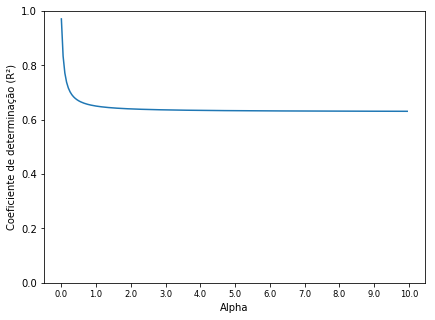

In [230]:
# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']

test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

training_points = x.head(TRAINING_POINTS)
training_labels = y.head(TRAINING_POINTS)

coefficient_list = list()

for alpha in np.arange(0.0, 10.0, 0.05):
    
    clf = Ridge(alpha=alpha)
    clf.fit(training_points, training_labels)
    
    coefficient = clf.score(test_points, test_labels)
    coefficient_list.append(coefficient)
    
    print("Coeficiente (alpha = {}): ".format(round(alpha, 2)) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

xticks = np.arange(0.0, 11.0, 1.0)

plt.plot(coefficient_list)
plt.xlabel('Alpha')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks(range(0, 201, 20), xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.show()

## Variando o fit_intercept

Coeficiente (fit_intercept = True): 0.6502026033776471
Coeficiente (fit_intercept = False): 0.6098879271327564


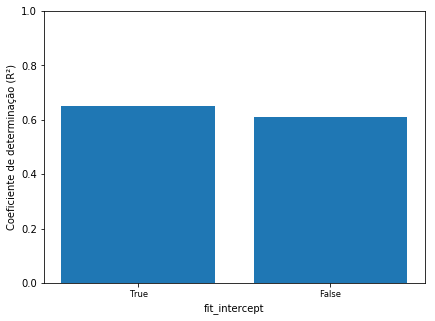

In [229]:
# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']

test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

training_points = x.head(TRAINING_POINTS)
training_labels = y.head(TRAINING_POINTS)

coefficient_list = list()

for fit_intercept in [True, False]:
    
    clf = Ridge(fit_intercept=fit_intercept)
    clf.fit(training_points, training_labels)
    
    coefficient = clf.score(test_points, test_labels)
    coefficient_list.append(coefficient)
    
    print("Coeficiente (fit_intercept = {}): ".format(fit_intercept) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

xticks = ['True', 'False']

plt.bar(range(len(coefficient_list)), coefficient_list)
plt.xlabel('fit_intercept')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks(range(0, 2, 1), xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.show()

## Variando o normalize

Coeficiente (normalize = True): 0.8351425310241787
Coeficiente (normalize = False): 0.6502026033776471


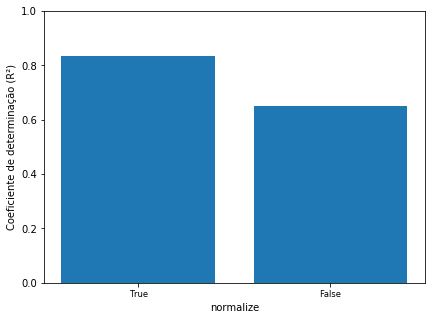

In [228]:
# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']

test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

training_points = x.head(TRAINING_POINTS)
training_labels = y.head(TRAINING_POINTS)

coefficient_list = list()

for normalize in [True, False]:
    
    clf = Ridge(normalize=normalize)
    clf.fit(training_points, training_labels)
    
    coefficient = clf.score(test_points, test_labels)
    coefficient_list.append(coefficient)
    
    print("Coeficiente (normalize = {}): ".format(normalize) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

xticks = ['True', 'False']

plt.bar(range(len(coefficient_list)), coefficient_list)
plt.xlabel('normalize')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks(range(0, 2, 1), xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.show()

## Variando max_iter

Coeficiente (max_iter = 0): 0.6502026033776471
Coeficiente (max_iter = 1000): 0.6502026033776471
Coeficiente (max_iter = 2000): 0.6502026033776471
Coeficiente (max_iter = 3000): 0.6502026033776471
Coeficiente (max_iter = 4000): 0.6502026033776471
Coeficiente (max_iter = 5000): 0.6502026033776471
Coeficiente (max_iter = 6000): 0.6502026033776471
Coeficiente (max_iter = 7000): 0.6502026033776471
Coeficiente (max_iter = 8000): 0.6502026033776471
Coeficiente (max_iter = 9000): 0.6502026033776471
Coeficiente (max_iter = 10000): 0.6502026033776471
Coeficiente (max_iter = 11000): 0.6502026033776471
Coeficiente (max_iter = 12000): 0.6502026033776471
Coeficiente (max_iter = 13000): 0.6502026033776471
Coeficiente (max_iter = 14000): 0.6502026033776471
Coeficiente (max_iter = 15000): 0.6502026033776471
Coeficiente (max_iter = 16000): 0.6502026033776471
Coeficiente (max_iter = 17000): 0.6502026033776471
Coeficiente (max_iter = 18000): 0.6502026033776471
Coeficiente (max_iter = 19000): 0.6502026033

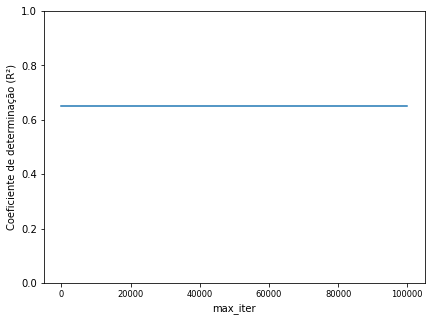

In [227]:
# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']

test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

training_points = x.head(TRAINING_POINTS)
training_labels = y.head(TRAINING_POINTS)

coefficient_list = list()

for max_iter in range(0, 100001, 1000):
    
    clf = Ridge(max_iter=max_iter)
    clf.fit(training_points, training_labels)
    
    coefficient = clf.score(test_points, test_labels)
    coefficient_list.append(coefficient)
    
    print("Coeficiente (max_iter = {}): ".format(max_iter) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

xticks = range(0, 100001, 20000)

plt.plot(coefficient_list)
plt.xlabel('max_iter')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks(range(0, 101, 20), xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.show()

## Variando solver

Coeficiente (solver = svd): 0.6502026033776538
Coeficiente (solver = cholesky): 0.6502026033776471
Coeficiente (solver = lsqr): -0.004534647354859311
Coeficiente (solver = sparse_cg): 0.46224960964807393
Coeficiente (solver = sag): -0.0036393795508415927
Coeficiente (solver = saga): -0.006470247829897469


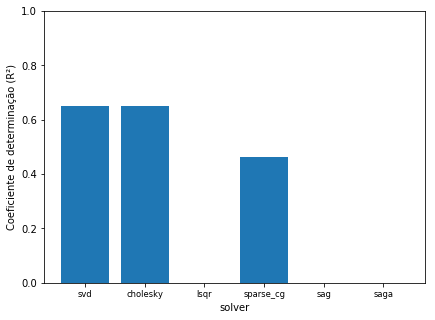

In [226]:
# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']

test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

training_points = x.head(TRAINING_POINTS)
training_labels = y.head(TRAINING_POINTS)

coefficient_list = list()

for solver in ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']:
    
    clf = Ridge(solver=solver, max_iter=1500)
    clf.fit(training_points, training_labels) 
    
    coefficient = clf.score(test_points, test_labels)
    coefficient_list.append(coefficient)
   
    
    print("Coeficiente (solver = {}): ".format(solver) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

xticks = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

plt.bar(range(len(coefficient_list)), coefficient_list)
plt.xlabel('solver')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks(range(0, 6, 1), xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.show()

## Variando número de rows com melhores hiperparâmetros

Mean absolute error: 6.674339636288908
Coeficiente (100 rows utilizadas para treinar): 0.9628259314028625
Mean absolute error: 29.4895486909541
Coeficiente (200 rows utilizadas para treinar): 0.6223261671981893
Mean absolute error: 29.37273495787949
Coeficiente (300 rows utilizadas para treinar): 0.6254071981934222
Mean absolute error: 14.425545390628429
Coeficiente (400 rows utilizadas para treinar): 0.8896479611085486
Mean absolute error: 12.159149076971586
Coeficiente (500 rows utilizadas para treinar): 0.9174226712528025
Mean absolute error: 9.759410666183872
Coeficiente (600 rows utilizadas para treinar): 0.9419709256050635
Mean absolute error: 8.654844705922526
Coeficiente (700 rows utilizadas para treinar): 0.9517529999965587
Mean absolute error: 6.569134993771012
Coeficiente (800 rows utilizadas para treinar): 0.9671650256766148
Mean absolute error: 6.164390585812922
Coeficiente (900 rows utilizadas para treinar): 0.969434988059724
Mean absolute error: 5.953955401132779
Coefici

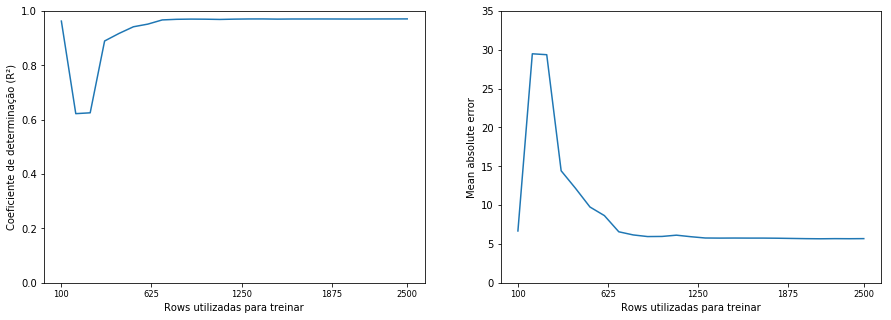

In [282]:
TRAINING_POINTS = 2500 + 1

# Definindo x e y
x = df.drop('APM', axis=1)
y = df['APM']
test_points = x.tail(y.shape[0]-TRAINING_POINTS)
test_labels = y.tail(y.shape[0]-TRAINING_POINTS)

clf = Ridge(alpha=1.0)
clf.fit(x, y) 
clf.score(x, y)


coefficient_list = list()
mean_absolute_error_list = list()

for training_points_number in range(100, TRAINING_POINTS, 100):

    training_points = x.head(training_points_number)
    training_labels = y.head(training_points_number)

    clf = Ridge(alpha=0, fit_intercept=True, normalize=True, solver='svd')
    clf.fit(training_points, training_labels) 
    
    coefficient = clf.score(test_points, test_labels)
    coefficient_list.append(coefficient)
    
    predict = clf.predict(test_points)
    mean_abs_err = mean_absolute_error(test_labels, predict)
    mean_absolute_error_list.append(mean_abs_err)
    
    print("Mean absolute error: " + str(mean_abs_err))
    print("Coeficiente ({} rows utilizadas para treinar): ".format(training_points_number) + str(coefficient))
    
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(coefficient_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(mean_absolute_error_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Mean absolute error')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=35)
plt.ylim(bottom=0)
plt.show()

## Comparação entre gráficos

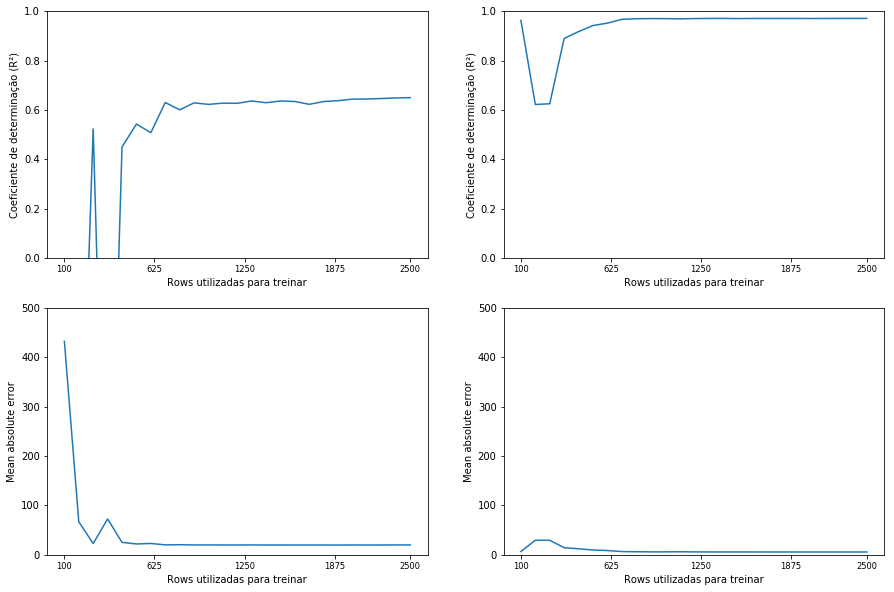

In [279]:
f = plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(initial_coefficient_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)

plt.subplot(2, 2, 2)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(coefficient_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Coeficiente de determinação (R²)')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=1)
plt.ylim(bottom=0)

plt.subplot(2, 2, 3)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(initial_mean_absolute_error_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Mean absolute error')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=500)
plt.ylim(bottom=0)

plt.subplot(2, 2, 4)
xticks = ['100', '625', '1250', '1875', '2500']

plt.plot(mean_absolute_error_list)
plt.xlabel('Rows utilizadas para treinar')
plt.ylabel('Mean absolute error')
plt.xticks([0, 6.25, 12.50, 18.75, 24], xticks, size='small')
plt.ylim(top=500)
plt.ylim(bottom=0)

plt.show()